<h2>
    Blood pressure
</h2>

<h3>
    Description: 
</h3>
<p>
The data set Diet.csv contains information on 120 people. The dataset contain blood pressure before and after an intervention.
</p>
<h3>Format: </h3><p> A data frame with 5 variables:</p>

<ul>
  <li>Patient - # patient</li>
  <li>Sex - sex</li>
  <li>Agegrp - age group</li>
  <li>Bp_before - blood pressure before an intervention</li>
  <li>Bp_after - blood pressure after an intervention</li>
</ul>

<p><b>
H0: No difference between mean blood pressure in test and control group<br>
H1: There is a difference between the mean blood pressure in the test group and the control group
</b></p>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Максим/Desktop/Statistics/blood_pressure.csv')

In [3]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [4]:
df.isnull().sum()

patient      0
sex          0
agegrp       0
bp_before    0
bp_after     0
dtype: int64

<h3>
    Requirements for Student's T-Test: 
</h3>

<ul>
  <li>The variances within our groups should be approximately the same (requirement for homogeneity of variances)</li>
  <li>Normality of the data of both groups.</li>
</ul>



In [5]:
print(f"Mean blood pressure before an intervention - {df['bp_before'].mean()} \nMean blood pressure after an intervention -  {np.round(df['bp_after'].mean(),2)}")

Mean blood pressure before an intervention - 156.45 
Mean blood pressure after an intervention -  151.36


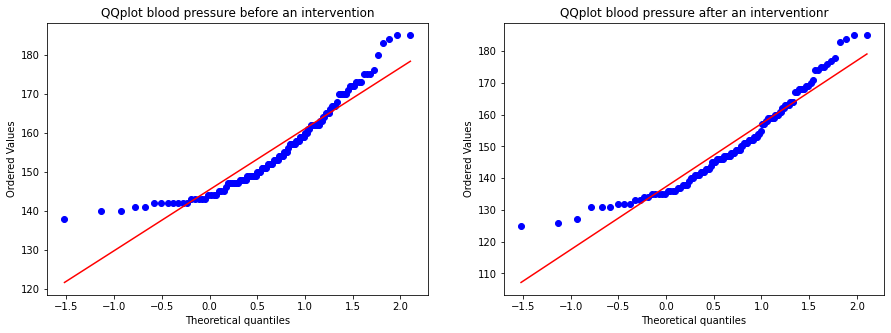

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

x = df['bp_before']
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax1)
ax1.set_title('QQplot blood pressure before an intervention')

x = df['bp_after']
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax2)
ax2.set_title('QQplot blood pressure after an interventionr')

plt.show()

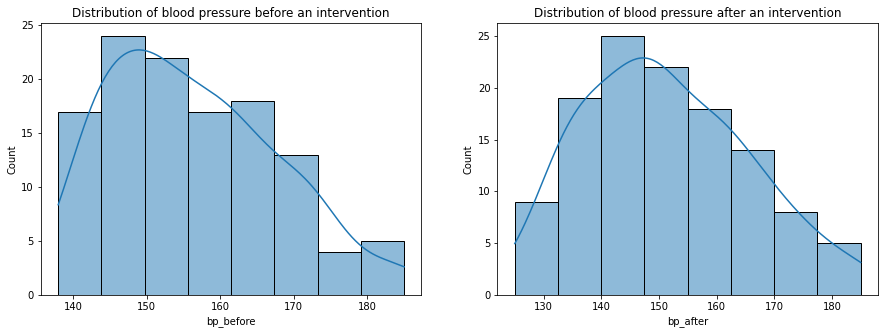

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
x1 = sns.histplot(data=df, x=df['bp_before'], kde=True, ax=axes[0])
x1.set_title('Distribution of blood pressure before an intervention')
x2 = sns.histplot(data=df, x=df['bp_after'], kde=True, ax=axes[1])
x2.set_title('Distribution of blood pressure after an intervention')
plt.show()

In [8]:
stats.shapiro(df['bp_before'])

ShapiroResult(statistic=0.9547787308692932, pvalue=0.0004928423441015184)

In [9]:
stats.shapiro(df['bp_after'])

ShapiroResult(statistic=0.9740639328956604, pvalue=0.020227791741490364)

<p><b>The distribution of bp_before and bp_after is not normal, p-value<0.05</b></p>

<h3>
    Let's check the homogeneity of groups using Levene's test 
</h3>
<p>Let's formulate a hypothesis:</p>
<ul>
  <li>H0 p-value > 0.05, variances within groups are homogeneous, do not reject the H0 hypothesis</li>
  <li>H1 p-value < 0.05, variances within groups are not homogeneous, reject the H0 hypothesis</li>
</ul>

In [10]:
stats.levene(df['bp_before'], df['bp_after'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

<p><b>p-value > 0.05, do not reject the H0 hypothesis</b></p>

<h3>
    Since the use of the T-Test requires that the data of both groups be normal,
we will use non-parametric Wilcoxon Sign-Ranked Test
</h3>

In [11]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)


<p><b>
Since the pvalue < 0.05, then we reject the H0 hypothesis and conclude that there is a difference between the mean blood pressure in the test and control group.
</b></p>

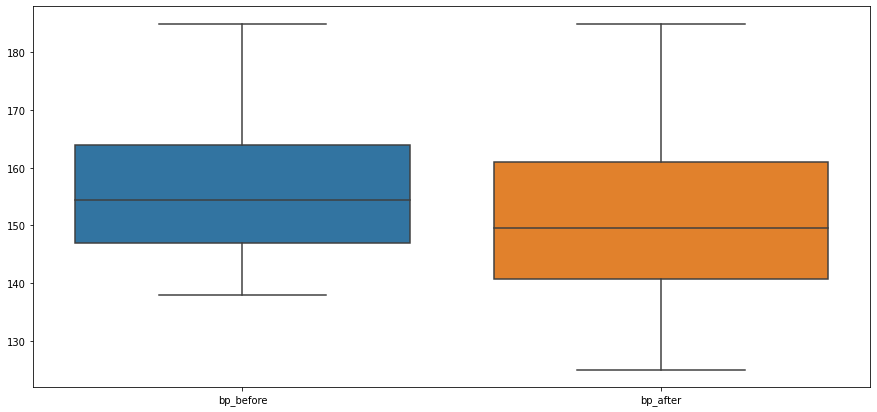

In [12]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=df[["bp_before", "bp_after"]])

In [13]:
pressure = np.round(((df['bp_before'].mean() - df['bp_after'].mean()) / df['bp_before'].mean())*100,2)
print(f"There was a {pressure} percent change in blood pressure in the test group compared to the control group.")

There was a 3.25 percent change in blood pressure in the test group compared to the control group.


<p><b>As a result, mean blood pressure changed statistically significantly. Mean blood pressure in the test is less than in the control.</b></p>